https://pystan.readthedocs.org/

Install

```
conda install pystan
```

In [1]:
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [3]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}


In [4]:
fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

/Users/udi/anaconda/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/udi/anaconda/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/udi/anaconda/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/udi/anaconda/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pi

In [5]:
fit

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.78    0.23   5.18  -2.52   4.68   7.73  10.89  18.61  488.0    1.0
tau         6.9    0.31   5.88   0.29   2.35    5.5    9.7  21.56  353.0    1.0
eta[0]      0.4    0.04    0.9   -1.4   -0.2   0.39   1.01   2.23  561.0    1.0
eta[1]    -0.01    0.03   0.84  -1.66  -0.56  -0.02   0.52    1.7  621.0    1.0
eta[2]    -0.19    0.04   0.93  -1.95  -0.79  -0.21   0.41   1.82  583.0    1.0
eta[3]    -0.03    0.04   0.87  -1.77   -0.6  -0.04    0.5   1.72  573.0    1.0
eta[4]    -0.35    0.04   0.87  -2.08  -0.89  -0.37   0.19    1.5  585.0    1.0
eta[5]     -0.2    0.03   0.85  -1.83  -0.74  -0.21   0.33   1.57  615.0    1.0
eta[6]     0.37    0.04   0.86  -1.48  -0.17    0.4   0.96   2.04  560.0    1.0
eta[7]     0.

In [6]:
la = fit.extract(permuted=True)
la.keys()

[u'mu', u'tau', u'eta', u'theta', u'lp__']

In [7]:
for k,v in la.iteritems():
    print k,v.shape

mu (2000,)
tau (2000,)
eta (2000, 8)
theta (2000, 8)
lp__ (2000,)


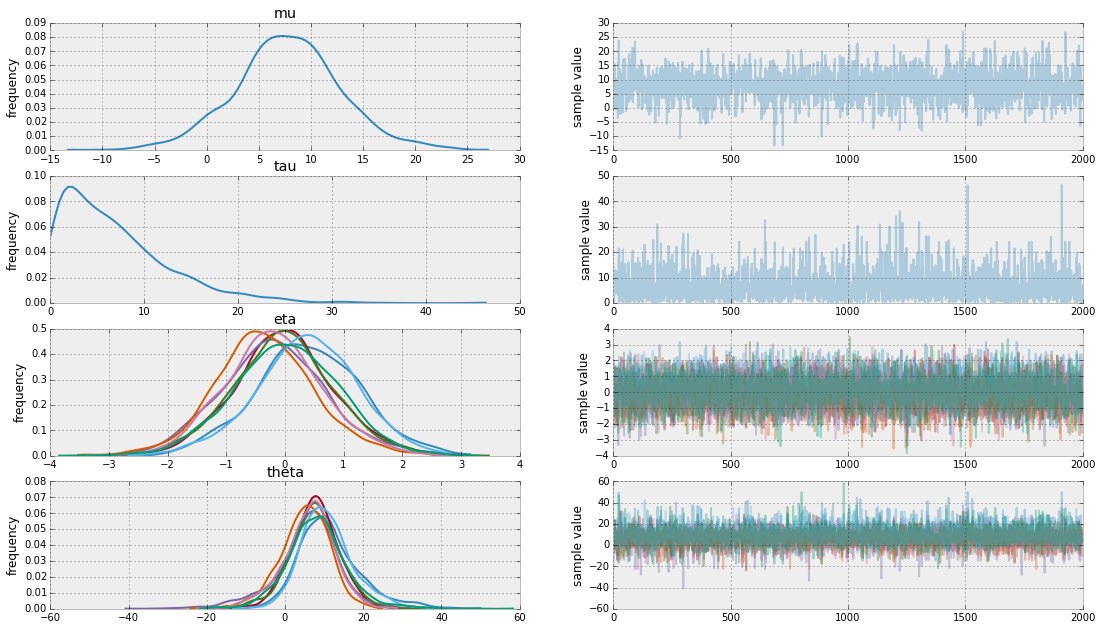

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

fit.plot()
plt.gcf().set_size_inches(18.5, 10.5);